In [1]:
import io
import numpy as np
import scipy.stats as st
import pandas as pd

import matplotlib.pyplot as plt
import graphviz
from IPython.display import Markdown

import lingam

np.random.seed(0)

# Dataset

In [2]:
# Prinz, Aloys Leo. "Chocolate consumption and noble laureates." Social Sciences & Humanities Open 2.1 (2020): 100082.
text = """
Country,Chocolate consumption (kg/year/capita),Coffee consumption (kg/year/capita),Number of Nobel laureates (up to the year 2018)
Australia,4.8,2.6,12
Austria,8.5,5.5,21
Belgium,6.4,4.9,10
Brazil,1.2,4.8,0
Canada,3.9,3.4,24
China,0.7,N.N.,9
Croatia,6.6,3.8,3
Denmark,6.9,5.3,14
Estonia,8.8,4.2,0
Finland,7.4,9.6,5
France,3.4,3.2,63
Germany,11.1,5.2,108
Greece,2.5,2.4,2
Hungary,2.9,3.1,13
Ireland,8.8,–,7
Italy,3.1,3.4,20
Japan,1.8,1.5,27
The Nether lands,4.5,6.7,20
Norway,9.2,7.2,13
Poland,2.2,3.1,12
Portugal,3.6,2.6,2
Romania,3.6,1.9,4
Spain,4.5,3.0,8
Sweden,4.4,–,30
Switzerland,10.3,3.9,26
UK,8.1,1.7,133
USA,5.3,3.1,375
"""

# https://en.wikipedia.org/wiki/List_of_countries_by_Nobel_laureates_per_capita
text2 = """
Rank,Entity,Nobel laureates,Population(2018),Nobel Laureates/10 million
,Faroe Islands,1,49489,202.065
1,Saint Lucia,2,179667,111.317
2,Luxembourg,2,590321,33.880
3,Sweden,33,9982709,33.057
4,Switzerland,27,8544034,31.601
5,Iceland,1,337780,29.605
6,Austria,23,8751820,26.280
7,Norway,13,5353363,24.284
8,Ireland,11,4803748,22.898
9,Denmark,13,5754356,22.592
10,United Kingdom,138,66573504,19.429
11,Hungary,15 ,9688847,15.4173 
12,Israel,13,8452841,15.379
13,East Timor,2,1324094,15.105
14,Germany,114,82293457,13.245
15,United States,409,326766748,11.721
16,Netherlands,21,17084459,11.707
17,France,75,65233271,10.664
18,Finland,5,5542517,9.021
19,Belgium,10,11498519,8.697
20,Cyprus,1,1189085,8.410
,European Union,378,444697104,8.005
21,Trinidad and Tobago,1,1372598,7.285
22,Canada,25,36953765,6.765
23,New Zealand,3,4749598,6.316
24,Bosnia and Herzegovina,2,3503554,5.708
25,Australia,14,24772247,5.651
26,Czech Republic,6,10625250,5.647
27,Latvia,1,1929938,5.182
28,Croatia,2,3888529,5.143
29,Poland,19,38104832,4.986
30,North Macedonia,1,2085051,4.796
31,Slovenia,1,2108708,4.742
32,Liberia,2,4853516,4.121
33,Lithuania,1,2876475,3.476
34,Italy,20,59290969,3.373
,Tibet,1,3310836,3.020
35,Japan,28,127185332,2.202
36,Belarus,2,9452113,2.116
37,Romania,4,19580634,2.043
38,Costa Rica,1,4953199,2.019
39,PLO,1,5052776,1.979
40,Portugal,2,10291196,1.943
41,Greece,2,11142161,1.795
42,South Africa,10,57398421,1.742
43,Spain,8,46397452,1.724
44,Russia,32,143964709,1.598
45,Bulgaria,1,7036848,1.421
,Hong Kong,1,7428887,1.346
,World,919,7632819325,1.204
46,Guatemala,2,17245346,1.160
47,Argentina,5,44688864,1.119
48,Chile,2,18197209,1.099
49,Azerbaijan,1,9923914,1.008
50,Algeria,2,42008054,0.476
51,Ukraine,2,44009214,0.454
52,Taiwan,1,23694089,0.422
53,Colombia,2,49464683,0.404
54,Egypt,4,99375741,0.403
56,Yemen,1,28915284,0.346
57,Ghana,1,29463643,0.339
58,Venezuela,1,32381221,0.309
59,Peru,1,32551815,0.307
69,Pakistan,4,200813818,0.300
60,Morocco,1,36191805,0.276
61,Iraq,1,39339753,0.254
62,Turkey,2,81916871,0.244
63,Iran,2,82011735,0.244
64,Mexico,3,130759074,0.229
65,Kenya,1,50950879,0.196
55,South Korea,1,51164435,0.195
66,Myanmar,1,53855735,0.186
-,Rojava,1,6171083,0.162
67,DR Congo,1,84004989,0.119
68,Vietnam,1,96491146,0.104
70,Ethiopia,1,109224410,0.092
71,India,11,1354051854,0.081
72,China,9,1415045928,0.064
73,Bangladesh,1,166368149,0.060
74,Nigeria,1,195875237,0.051
"""

# https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)
text3 = """
Country/Territory,UN region,IMF_Forecast,IMF_Year,World Bank_Estimate,World Bank_Year,United Nations_Estimate,United Nations_Year
World,,104476432,2023,100562011,2022,96698005,2021
United States,Americas,26949643,2023,25462700,2022,23315081,2021
China,Asia,17700899,2023,17963171,2022,17734131,2021
Germany,Europe,4429838,2023,4072192,2022,4259935,2021
Japan,Asia,4230862,2023,4231141,2022,4940878,2021
India,Asia,3732224,2023,3385090,2022,3201471,2021
United Kingdom,Europe,3332059,2023,3070668,2022,3131378,2021
France,Europe,3049016,2023,2782905,2022,2957880,2021
Italy,Europe,2186082,2023,2010432,2022,2107703,2021
Brazil,Americas,2126809,2023,1920096,2022,1608981,2021
Canada,Americas,2117805,2023,2139840,2022,1988336,2021
Russia,Europe,1862470,2023,2240422,2022,1778782,2021
Mexico,Americas,1811468,2023,1414187,2022,1272839,2021
South Korea,Asia,1709232,2023,1665246,2022,1810966,2021
Australia,Oceania,1687713,2023,1675419,2022,1734532,2021
Spain,Europe,1582054,2023,1397509,2022,1427381,2021
Indonesia,Asia,1417387,2023,1319100,2022,1186093,2021
Turkey,Asia,1154600,2023,905988,2022,819034,2021
Netherlands,Europe,1092748,2023,991115,2022,1012847,2021
Saudi Arabia,Asia,1069437,2023,1108149,2022,833541,2021
Switzerland,Europe,905684,2023,807706,2022,812867,2021
Poland,Europe,842172,2023,688177,2022,679442,2021
Taiwan,Asia,751930,2023,,
Belgium,Europe,627511,2023,578604,2022,594104,2021
Argentina,Americas,621833,2023,632770,2022,487227,2021
Sweden,Europe,597110,2023,585939,2022,635664,2021
Ireland,Europe,589569,2023,529245,2022,504183,2021
Norway,Europe,546768,2023,579267,2022,482175,2021
Austria,Europe,526182,2023,471400,2022,480368,2021
Israel,Asia,521688,2023,522033,2022,481591,2021
Thailand,Asia,512193,2023,495341,2022,505982,2021
United Arab Emirates,Asia,509179,2023,507535,2022,405468,2021
Singapore,Asia,497347,2023,466789,2022,396992,2021
Bangladesh,Asia,446349,2023,460201,2022,414907,2021
Philippines,Asia,435675,2023,404284,2022,394086,2021
Vietnam,Asia,433356,2023,408802,2022,366138,2021
Malaysia,Asia,430895,2023,406306,2022,372702,2021
Denmark,Europe,420800,2023,395404,2022,398303,2021
Egypt,Africa,398397,2023,476748,2022,425906,2021
Nigeria,Africa,390002,2023,477386,2022,430923,2021
Hong Kong,Asia,385546,2023,359839,2022,369174,2021
South Africa,Africa,380906,2023,405870,2022,419016,2021
Iran,Asia,366438,2023,388544,2022,594892,2021
Colombia,Americas,363835,2023,343939,2022,314464,2021
Romania,Europe,350414,2023,301262,2022,284086,2021
Chile,Americas,344400,2023,301025,2022,317059,2021
Pakistan,Asia,340636,2023,376533,2022,342501,2021
Czech Republic,Europe,335243,2023,290924,2022,281778,2021
Finland,Europe,305689,2023,280826,2022,297302,2021
Iraq,Asia,297695,2023,264182,2022,204004,2021
Portugal,Europe,276432,2023,251945,2022,253663,2021
Peru,Americas,264636,2023,242632,2022,223252,2021
Kazakhstan,Asia,259292,2023,220623,2022,193018,2021
New Zealand,Oceania,249415,2023,247234,2022,250451,2021
Greece,Europe,242385,2023,219066,2022,214874,2021
Qatar,Asia,235500,2023,237296,2022,179571,2021
Algeria,Africa,224107,2023,191913,2022,163473,2021
Hungary,Europe,203829,2023,178789,2022,181848,2021
Ukraine,Europe,173413,2023,160503,2022,200086,2021
Kuwait,Asia,159687,2023,184558,2022,136642,2021
Ethiopia,Africa,155804,2023,126783,2022,99269,2021
Morocco,Africa,147343,2023,134182,2022,142867,2021
Slovakia,Europe,133044,2023,115469,2022,116527,2021
Cuba,Americas,,633442,2022,126694,2021
Dominican Republic,Americas,120629,2023,113642,2022,94243,2021
Ecuador,Americas,118686,2023,115049,2022,106166,2021
Puerto Rico,Americas,117515,2023,113435,2022,106526,2021
Kenya,Africa,112749,2023,113420,2022,110347,2021
Oman,Asia,108282,2023,114667,2022,88192,2021
Bulgaria,Europe,103099,2023,89040,2022,84058,2021
Guatemala,Americas,102765,2023,95003,2022,85986,2021
Angola,Africa,93796,2023,106714,2022,70533,2021
Venezuela,Americas,92210,2023,,111813,2021
Uzbekistan,Asia,90392,2023,80392,2022,69239,2021
Luxembourg,Europe,89095,2023,82275,2022,85506,2021
Costa Rica,Americas,85590,2023,68381,2022,64282,2021
Tanzania,Africa,84033,2023,75709,2022,70297,2021
Panama,Americas,82348,2023,76523,2022,63605,2021
Turkmenistan,Asia,81822,2023,,53954,2021
Croatia,Europe,80185,2023,70965,2022,68955,2021
Ivory Coast,Africa,79430,2023,70019,2022,69765,2021
Lithuania,Europe,79427,2023,70334,2022,66445,2021
Azerbaijan,Asia,77392,2023,78721,2022,54622,2021
Ghana,Africa,76628,2023,72839,2022,79083,2021
Uruguay,Americas,76244,2023,71177,2022,59318,2021
Serbia,Europe,75015,2023,63502,2022,63068,2021
Myanmar,Asia,74861,2023,59364,2022,58582,2021
Sri Lanka,Asia,,74404,2022,85309,2021
Belarus,Europe,68864,2023,72793,2022,68206,2021
Slovenia,Europe,68394,2023,62118,2022,61749,2021
DR Congo,Africa,67512,2023,58066,2022,52850,2021
Uganda,Africa,52390,2023,45559,2022,42661,2021
Tunisia,Africa,51271,2023,46665,2022,46687,2021
Jordan,Asia,50022,2023,47452,2022,45244,2021
Cameroon,Africa,49262,2023,44342,2022,45368,2021
Bolivia,Americas,46796,2023,43069,2022,40408,2021
Latvia,Europe,46668,2023,41154,2022,39854,2021
Bahrain,Asia,44994,2023,44391,2022,38869,2021
Paraguay,Americas,44142,2023,41722,2022,40458,2021
Estonia,Europe,41799,2023,38101,2022,37191,2021
Nepal,Asia,41339,2023,40828,2022,36207,2021
Libya,Africa,40194,2023,45752,2022,39006,2021
Macau,Asia,38480,2023,21979,2022,29905,2021
Lebanon,Asia,,,37945,2021
El Salvador,Americas,35339,2023,32489,2022,28737,2021
Honduras,Americas,33992,2023,31718,2022,28489,2021
Zimbabwe,Africa,32424,2023,20678,2022,24118,2021
Cyprus,Asia,32032,2023,28439,2022,28408,2021
Papua New Guinea,Oceania,31692,2023,30633,2022,26595,2021
Senegal,Africa,31141,2023,27684,2022,27625,2021
Cambodia,Asia,30943,2023,29957,2022,26669,2021
Iceland,Europe,30570,2023,27842,2022,25602,2021
Georgia,Asia,30023,2023,24605,2022,18696,2021
Zambia,Africa,29536,2023,29784,2022,21313,2021
Trinidad and Tobago,Americas,27887,2023,27899,2022,24460,2021
Bosnia and Herzegovina,Europe,26945,2023,24528,2022,23365,2021
Haiti,Americas,25986,2023,20254,2022,19044,2021
Sudan,Africa,25569,2023,51662,2022,35867,2021
Armenia,Asia,24540,2023,19503,2022,13861,2021
Guinea,Africa,23205,2023,21228,2022,16036,2021
Albania,Europe,23032,2023,18882,2022,18260,2021
Mozambique,Africa,21936,2023,17851,2022,15777,2021
Mali,Africa,21309,2023,18827,2022,19157,2021
Yemen,Asia,21045,2023,,9947,2021
Burkina Faso,Africa,20785,2023,18885,2022,19738,2021
Botswana,Africa,20756,2023,20352,2022,17615,2021
Malta,Europe,20311,2023,17765,2022,17721,2021
Benin,Africa,19940,2023,17402,2022,17688,2021
Syria,Asia,,,19719,2021
Gabon,Africa,19319,2023,21072,2022,18521,2021
Palestine,Asia,18109,2021,19112,2022,18037,2021
Mongolia,Asia,18782,2023,16811,2022,15098,2021
Jamaica,Americas,18761,2023,17098,2022,14658,2021
Nicaragua,Americas,17353,2023,15672,2022,14013,2021
Niger,Africa,17073,2023,13970,2022,14915,2021
North Korea,Asia,,,16750,2021
Guyana,Americas,16329,2023,15358,2022,8044,2021
Moldova,Europe,16000,2023,14421,2022,13680,2021
North Macedonia,Europe,15801,2023,13563,2022,13881,2021
Madagascar,Africa,15763,2023,14955,2022,14450,2021
Brunei,Asia,15153,2023,16682,2022,14006,2021
Afghanistan,Asia,,,14939,2021
Mauritius,Africa,14819,2023,12898,2022,11525,2021
Congo,Africa,14407,2023,14616,2022,12841,2021
Laos,Asia,14244,2023,15724,2022,19074,2021
Rwanda,Africa,13927,2023,13313,2022,11070,2021
Bahamas,Americas,13876,2023,12897,2022,11209,2021
Malawi,Africa,13176,2023,13165,2022,12199,2021
Kyrgyzstan,Asia,12681,2023,10931,2022,8741,2021
Namibia,Africa,12647,2023,12607,2022,12236,2021
Chad,Africa,12596,2023,12704,2022,16410,2021
Tajikistan,Asia,11816,2023,10492,2022,8746,2021
Somalia,Africa,11515,2023,8126,2022,7628,2021
Kosovo,Europe,10469,2023,9429,2022,9412,2021
Mauritania,Africa,10357,2023,10375,2022,9996,2021
New Caledonia,Oceania,,,10071,2021
Equatorial Guinea,Africa,10041,2023,11814,2022,12431,2021
Togo,Africa,9111,2023,8126,2022,8160,2021
Monaco,Europe,,,8596,2021
Bermuda,Americas,,7551,2022,7231,2021
Montenegro,Europe,7058,2023,6096,2022,5809,2021
Maldives,Asia,6977,2023,6190,2022,5406,2021
Liechtenstein,Europe,,,6608,2021
South Sudan,Africa,6267,2023,,4304,2021
Barbados,Americas,6220,2023,5638,2022,4844,2021
French Polynesia,Oceania,,,6055,2021
Cayman Islands,Americas,,,5809,2021
Fiji,Oceania,5511,2023,4943,2022,4296,2021
Eswatini,Africa,4648,2023,4854,2022,4732,2021
Liberia,Africa,4347,2023,4001,2022,2445,2021
Djibouti,Africa,3873,2023,3515,2022,3701,2021
Aruba,Americas,3827,2023,,3126,2021
Andorra,Europe,3692,2023,3352,2022,3325,2021
Suriname,Americas,3539,2023,3621,2022,3224,2021
Sierra Leone,Africa,3519,2023,3970,2022,4249,2021
Greenland,Americas,,,3273,2021
Belize,Americas,3218,2023,2824,2022,2492,2021
Burundi,Africa,3190,2023,3073,2022,3900,2021
Central African Republic,Africa,2760,2023,2383,2022,2518,2021
Curaçao,Americas,,,2700,2021
Bhutan,Asia,2686,2023,,2381,2021
Cape Verde,Africa,2598,2023,2315,2022,1936,2021
Saint Lucia,Americas,2469,2023,2065,2022,1765,2021
Gambia,Africa,2388,2023,2273,2022,2038,2021
Lesotho,Africa,2373,2023,2553,2022,2373,2021
Eritrea,Africa,,,2255,2021
Seychelles,Africa,2085,2023,1588,2022,1287,2021
Zanzibar,Africa,,,2080,2021
East Timor,Asia,2023,2023,3163,2022,2004,2021
San Marino,Europe,1998,2023,,1702,2021
Guinea-Bissau,Africa,1991,2023,1634,2022,1563,2021
Antigua and Barbuda,Americas,1949,2023,1758,2022,1421,2021
Solomon Islands,Oceania,1690,2023,1596,2022,1632,2021
Sint Maarten,Americas,,1572,2022,1154,2021
British Virgin Islands,Americas,,,1539,2021
Comoros,Africa,1364,2023,1243,2022,1340,2021
Grenada,Americas,1306,2023,1256,2022,1115,2021
Vanuatu,Oceania,1166,2023,984,2022,981,2021
Turks and Caicos Islands,Americas,,1139,2022,943,2021
Saint Kitts and Nevis,Americas,1069,2023,962,2022,861,2021
Saint Vincent and the Grenadines,Americas,1039,2023,949,2022,881,2021
Samoa,Oceania,939,2023,832,2022,857,2021
Dominica,Americas,697,2023,612,2022,548,2021
São Tomé and Príncipe,Africa,674,2023,547,2022,555,2021
Tonga,Oceania,547,2023,,472,2021
Micronesia,Oceania,458,2023,427,2022,404,2021
Cook Islands,Oceania,,,328,2021
Anguilla,Americas,,,303,2021
Marshall Islands,Oceania,277,2023,280,2022,257,2021
Palau,Oceania,267,2023,,218,2021
Kiribati,Oceania,246,2023,223,2022,227,2021
Nauru,Oceania,150,2023,151,2022,155,2021
Montserrat,Americas,,,72,2021
Tuvalu,Oceania,63,2023,60,2022,60,2021
"""

df = pd.read_csv(io.StringIO(text))
df2 = pd.read_csv(io.StringIO(text2))
df3 = pd.read_csv(io.StringIO(text3))
df = df.merge(df2, left_on="Country", right_on="Entity")
df = df.merge(df3, left_on="Country", right_on="Country/Territory")

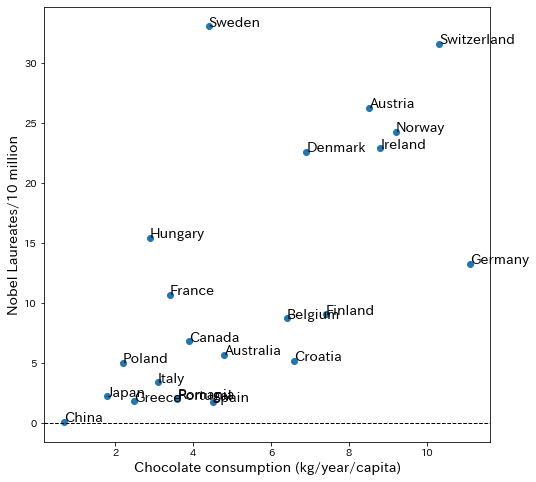

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(df["Chocolate consumption (kg/year/capita)"], df["Nobel Laureates/10 million"])
for i, row in df.iterrows():
    plt.annotate(row["Country"], (row["Chocolate consumption (kg/year/capita)"], row["Nobel Laureates/10 million"]), fontsize=14)
plt.xlabel("Chocolate consumption (kg/year/capita)", fontsize=14)
plt.ylabel("Nobel Laureates/10 million", fontsize=14)
plt.axhline(0, color="black", ls="dashed", lw=1)
plt.show()

# Causation

## Correlation

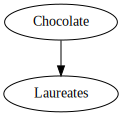

In [4]:
s = """
digraph {
    Chocolate -> Laureates
}
"""
graphviz.Source(s)

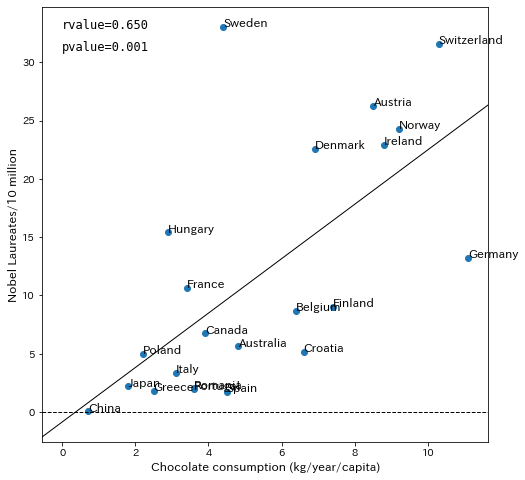

In [5]:
result = st.linregress(df["Chocolate consumption (kg/year/capita)"], df["Nobel Laureates/10 million"])

def draw(ax, df, x_name, y_name):
    result = st.linregress(df[x_name], df[y_name])
    
    ax.scatter(df[x_name], df[y_name])
    ax.axline((0, result.intercept), slope=result.slope, c="black", lw=1)
    for i, row in df.iterrows():
        ax.annotate(row["Country"], (row[x_name], row[y_name]), fontsize=12)

    ylim = ax.get_ylim()
    y_unit = (ylim[1] - ylim[0]) / 10
    ax.text(0, y_unit * 9.5 + ylim[0], f"rvalue={result.rvalue:.3f}", fontsize=12, family="monospace")
    ax.text(0, y_unit * 9 + ylim[0], f"pvalue={result.pvalue:.3f}", fontsize=12, family="monospace")
    
    ax.set_xlabel(x_name, fontsize=12)
    ax.set_ylabel(y_name, fontsize=12)
    ax.axhline(0, color="black", ls="dashed", lw=1)

plt.figure(figsize=(8, 8))
draw(plt.gca(), df, "Chocolate consumption (kg/year/capita)", "Nobel Laureates/10 million")
plt.show()

## Spurious correlation

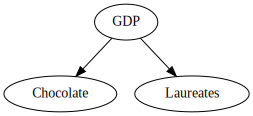

In [6]:
s = """
digraph {
    GDP [pos="0,0!"]
    Chocolate [pos="-1,-1!"]
    Laureates [pos="1,-1!"]
    GDP -> Chocolate
    GDP -> Laureates
}
"""
graphviz.Source(s)

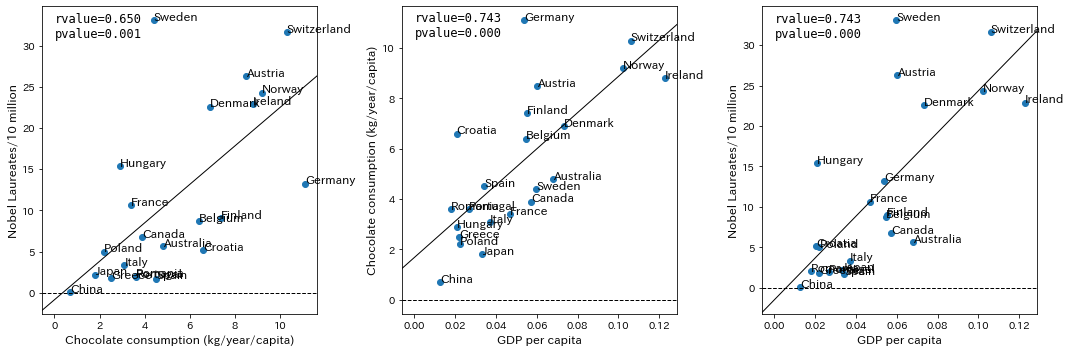

In [7]:
df["GDP per capita"] = df["IMF_Forecast"]  / df["Population(2018)"]

fig, axes = plt.subplots(1, 3, figsize=(5 * 3, 5))
draw(axes[0], df, "Chocolate consumption (kg/year/capita)", "Nobel Laureates/10 million")
draw(axes[1], df, "GDP per capita", "Chocolate consumption (kg/year/capita)")
draw(axes[2], df, "GDP per capita", "Nobel Laureates/10 million")
plt.tight_layout()
plt.show()

# Causal discovery

## Estimating causal graph

In [8]:
X = df[["GDP per capita", "Chocolate consumption (kg/year/capita)", "Nobel Laureates/10 million"]]

model = lingam.DirectLiNGAM()
model.fit(X)
model.adjacency_matrix_

array([[  0.        ,   0.        ,   0.        ],
       [ 71.91136412,   0.        ,   0.        ],
       [258.3438483 ,   0.        ,   0.        ]])

This matrix means following equations.

$
\begin{align}
&X_{gdp} = e_{gdp} \\
&X_{chocolate} = 71.9 X_{gdp} + e_{chocolate} \\
&X_{laureates} = 258.3 X_{gdp} + e_{laureates}
\end{align}
$

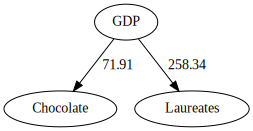

In [9]:
labels = ["GDP", "Chocolate", "Laureates"]
lingam.utils.make_dot(model.adjacency_matrix_, labels=labels)

## Evaluating statistical reliability

In [10]:
model = lingam.DirectLiNGAM()

n_sampling = 300
result = model.bootstrap(X, n_sampling)

### Histogram of coefficients

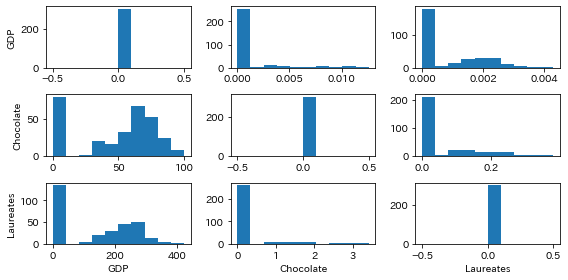

### Probability of Existence

,GDP,Chocolate,Laureates
GDP,0.000,0.160,0.407
Chocolate,0.737,0.000,0.300
Laureates,0.553,0.137,0.000


### Means (excluding zero)

,GDP,Chocolate,Laureates
GDP,NaN,0.007,0.002
Chocolate,64.844,NaN,0.170
Laureates,235.867,1.827,NaN


In [11]:
# histogram
display(Markdown("### Histogram of coefficients"))

fig, axes = plt.subplots(3, 3, figsize=(8, 4))

for i in range(3):
    for j in range(3):
        axes[i, j].hist(result.adjacency_matrices_[:, i, j])

for i in range(3):
    axes[i, 0].set_ylabel(labels[i])
for i in range(3):
    axes[2, i].set_xlabel(labels[i])
    
plt.tight_layout()
plt.show()

# probability of existence
display(Markdown("### Probability of Existence"))
probs = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        probs[i, j] = sum(~np.isclose(result.adjacency_matrices_[:, i, j], 0)) / n_sampling
display(pd.DataFrame(probs, columns=labels, index=labels).applymap(lambda x: f"{x:.3f}"))

# means (excluding zero)
display(Markdown("### Means (excluding zero)"))
means = np.zeros((3, 3)) * np.nan
for i in range(3):
    for j in range(3):
        n_exists = sum(~np.isclose(result.adjacency_matrices_[:, i, j], 0))
        if n_exists == 0:
            continue
        means[i, j] = sum(result.adjacency_matrices_[:, i, j]) / n_exists
display(pd.DataFrame(means, columns=labels, index=labels).applymap(lambda x: f"{x:.3f}" if not np.isnan(x) else x))

## Hidden common cause

In [12]:
X = df[["Chocolate consumption (kg/year/capita)", "Nobel Laureates/10 million"]]

model = lingam.RCD()
model.fit(X)
model.adjacency_matrix_

array([[ 0., nan],
       [nan,  0.]])